<a href="https://colab.research.google.com/github/prxrwx/Stat-learning-for-datasci/blob/main/SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ดาวน์โหลดข้อมูลอุณหภูมิสูงสุดรายวันปี 1998-2019 จาก link ข้างล่างนี้  
http://www.donlapark.cmustat.com/229351/data/CM_temp.csv 

1. เปลี่ยนจากข้อมูลรายวันให้เป็นข้อมูลค่าเฉลี่ยรายเดือน
2. จงแบ่งข้อมูลโดยให้ Test set เป็นข้อมูลของ 2 ปีสุดท้ายและ Training set เป็นข้อมูลที่เหลือ
3. ลองสร้างโมเดล SARIMA อันดับต่างๆ แล้วระบุโมเดลที่ดีที่สุด
4. จงแสดงแผนภาพของข้อมูลจริงกับข้อมูลที่ได้ในข้อ 2

In [ ]:
# uploading the csv file to colab

!pip install wget

!python -m wget -o CM_temp.csv http://www.donlapark.cmustat.com/229351/data/CM_temp.csv

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=f542d4a09c5fb769b819cf03450ac9273fd706d875b4090d36a2aff4ba930995
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget

Saved under CM_temp.csv


In [ ]:
!pip3 install pmdarima

     |████████████████████████████████| 1.4 MB 12.6 MB/s 
     |████████████████████████████████| 9.8 MB 10.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
# import module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
# ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
def parser(dates):
  return pd.datetime.strptime(dates, '%Y-%m-%d')

# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
data = pd.read_csv('CM_temp.csv', parse_dates=['Date'], 
                                        index_col='Date',
                                        date_parser=parser)

data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,MaxTemp
Date,
1998-01-01,30.6
1998-01-02,32.0
1998-01-03,31.6
1998-01-04,32.1
1998-01-05,31.2


ข้อมูล (สมมติว่าชื่อ `data`) ที่ load มาเป็นข้อมูลรายวัน ทำการหาค่าเฉลี่ยรายเดือนด้วยคำสั่ง

In [ ]:
y = data['MaxTemp'].resample("M").mean()

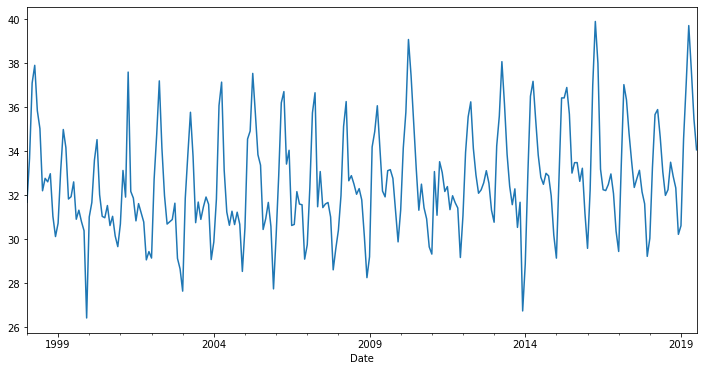

In [ ]:
plt.figure(figsize=(12,6))
y.plot();

In [ ]:
def rmse(y_true,y_pred):
  # Inputs
  # y_true: actual value, y_pred: predicted values
  # Output: RMSE between y_true and y_pred
  return np.sqrt(np.mean(np.square(y_true-y_pred)))

Train-Test Split

In [ ]:
train = y[:-24]
test = y[-24:]

print(test)

Date
2017-08-31    32.764516
2017-09-30    33.140000
2017-10-31    32.158065
2017-11-30    31.616667
2017-12-31    29.229032
2018-01-31    30.048387
2018-02-28    33.253571
2018-03-31    35.674194
2018-04-30    35.900000
2018-05-31    34.648387
2018-06-30    33.066667
2018-07-31    32.000000
2018-08-31    32.258065
2018-09-30    33.506667
2018-10-31    32.864516
2018-11-30    32.336667
2018-12-31    30.229032
2019-01-31    30.622581
2019-02-28    34.564286
2019-03-31    37.051613
2019-04-30    39.716667
2019-05-31    37.680645
2019-06-30    35.466667
2019-07-31    34.070968
Freq: M, Name: MaxTemp, dtype: float64


SARIMA Model

In [ ]:
!pip3 install pmdarima

In [ ]:
import pmdarima as pm

auto_fit = pm.auto_arima(train, start_p=0, start_q=0, max_p=3, max_q=3, d=0,
                             seasonal=True, m=12, start_P=0, start_Q=0, D=0,
                             information_criterion = 'aicc', # choose model with the lowest corrected AIC
                             trace = True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True) # don't want convergence warnings

Performing stepwise search to minimize aicc
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AICC=1077.722, Time=0.08 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AICC=inf, Time=2.86 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AICC=899.760, Time=0.83 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AICC=2306.808, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AICC=964.868, Time=0.17 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AICC=789.449, Time=3.16 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AICC=834.782, Time=3.01 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AICC=inf, Time=5.41 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AICC=791.785, Time=5.16 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AICC=866.494, Time=0.73 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AICC=798.557, Time=2.47 sec
 ARIMA(0,0,1)(2,0,2)[12] intercept   : AICC=854.749, Time=3.39 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AICC=826.467, Time=1.00 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AICC=817.363, Time=1.55 sec
 ARIMA(0,0,2)(1,0,1)[12]

In [ ]:
auto_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  235
Model:             SARIMAX(0, 0, 2)x(1, 0, [1], 12)   Log Likelihood                -379.668
Date:                              Mon, 07 Feb 2022   AIC                            771.336
Time:                                      05:10:05   BIC                            792.093
Sample:                                           0   HQIC                           779.704
                                              - 235                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.0173      1.264      3.178      0.001       1.539       6.495
ma.L1          0.4404      0.059      7.500      0.000       0.325       0.555
ma.L2          0.3114      0.066      4.753      0.000       0.183       0.440
ar.S.L12       0.8761      0.039     22.670      0.000       0.800       0.952
ma.S.L12      -0.4522      0.085     -5.297      0.000      -0.619      -0.285
sigma2         1.4048      0.122     11.511      0.000       1.166       1.644
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 8.40
Prob(Q):                              0.73   Prob(JB):                         0.01
Heteroskedasticity (H):               0.85   Skew:                             0.03
Prob(H) (two-sided):                  0.48   Kurtosis:                         3.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

>โมเดลที่ดีที่สุด คือ SARIMA(0, 0, 2)(1, 0, 1, 12)	



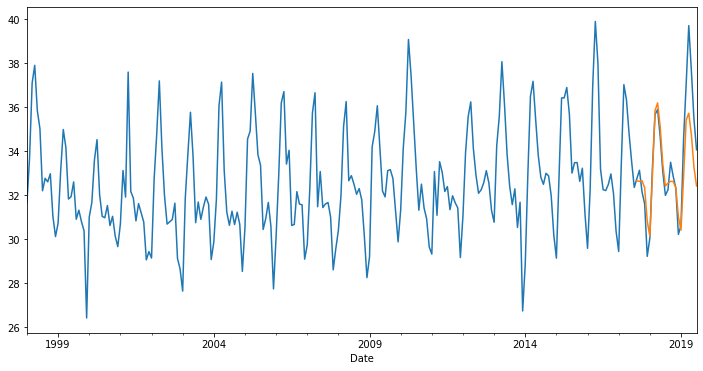

In [ ]:
predictions = auto_fit.predict(24)
yhat = pd.Series(predictions,
                    index=test.index)

plt.figure(figsize=(12,6))
ax = y.plot()
yhat.plot(ax=ax);